In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Checking whether any null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Since there are no null values ,we can say that our data is clean.

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.shape

(9994, 13)

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Data Analysis

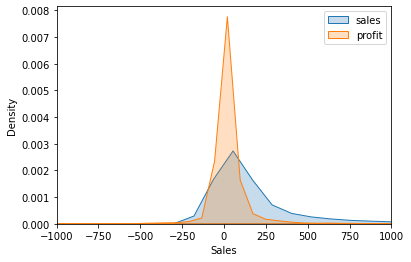

In [ ]:
sns.kdeplot(data['Sales'],label="sales",shade=True)
sns.kdeplot(data['Profit'],label="profit",shade=True)
plt.xlim(-1000,1000)
plt.legend()

By observing above graph,we can say that profits are higher than sales. 

In [ ]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


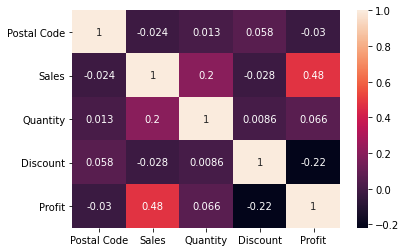

In [ ]:
sns.heatmap(data.corr(),annot=True)

By Observing above graph, we can say that:

1.Profits and Discounts are negatively correlated

2.Profit and Sales are positively correlated

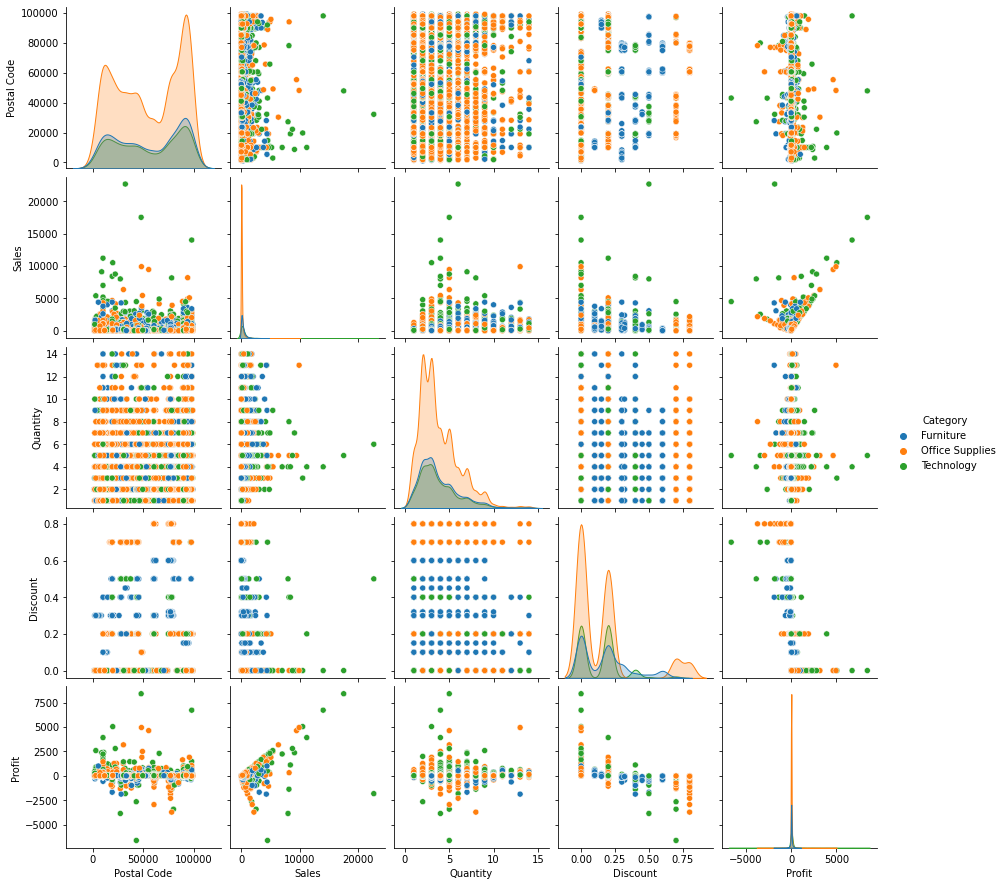

In [ ]:
#Using pairplot for analysis
sns.pairplot(data,hue="Category")

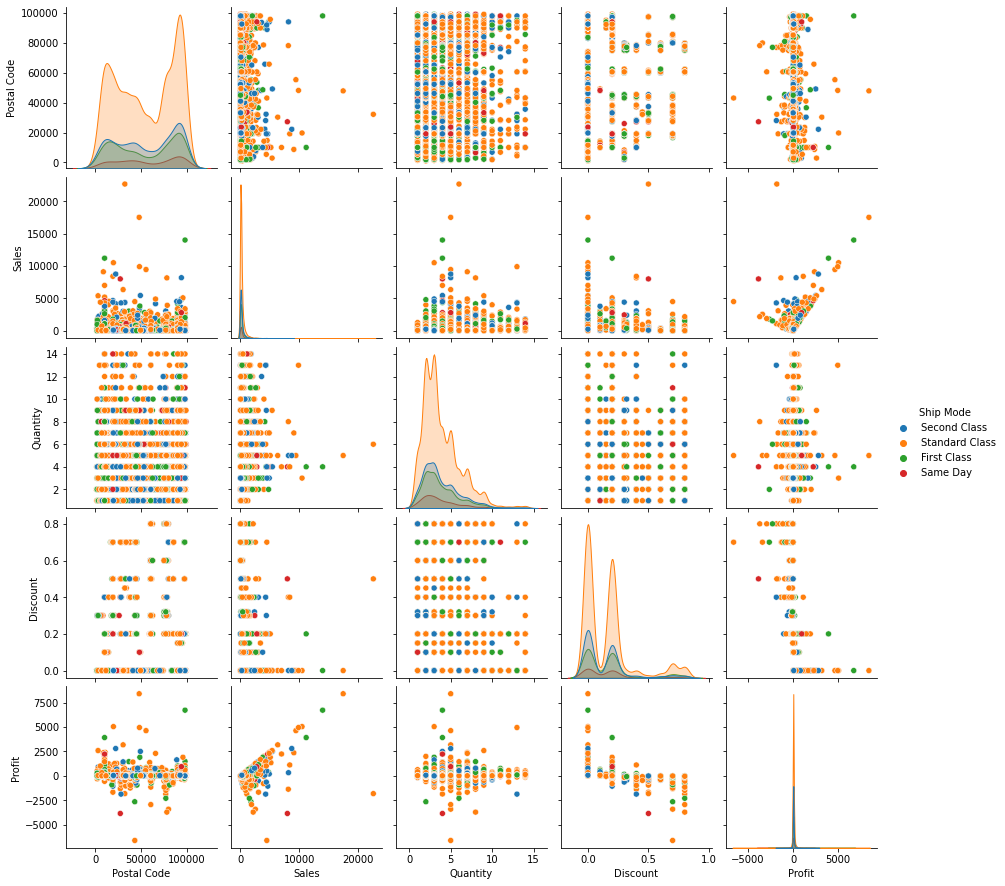

In [ ]:
sns.pairplot(data,hue='Ship Mode')

State-wise Analysis

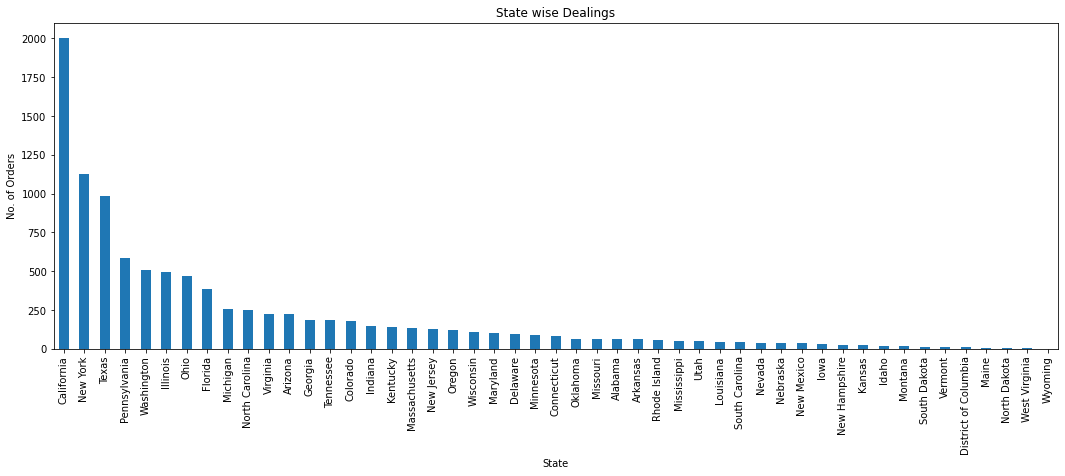

In [ ]:
plt.xlabel("State")
plt.ylabel("No. of Orders")
plt.title("State wise Dealings")
state_count=data["State"].value_counts()
state_count.plot(kind="bar",figsize=(18,6))


In [ ]:
data["State"].value_counts().mean()

203.9591836734694

In [ ]:
data_state=data.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
data_state.head(5)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351


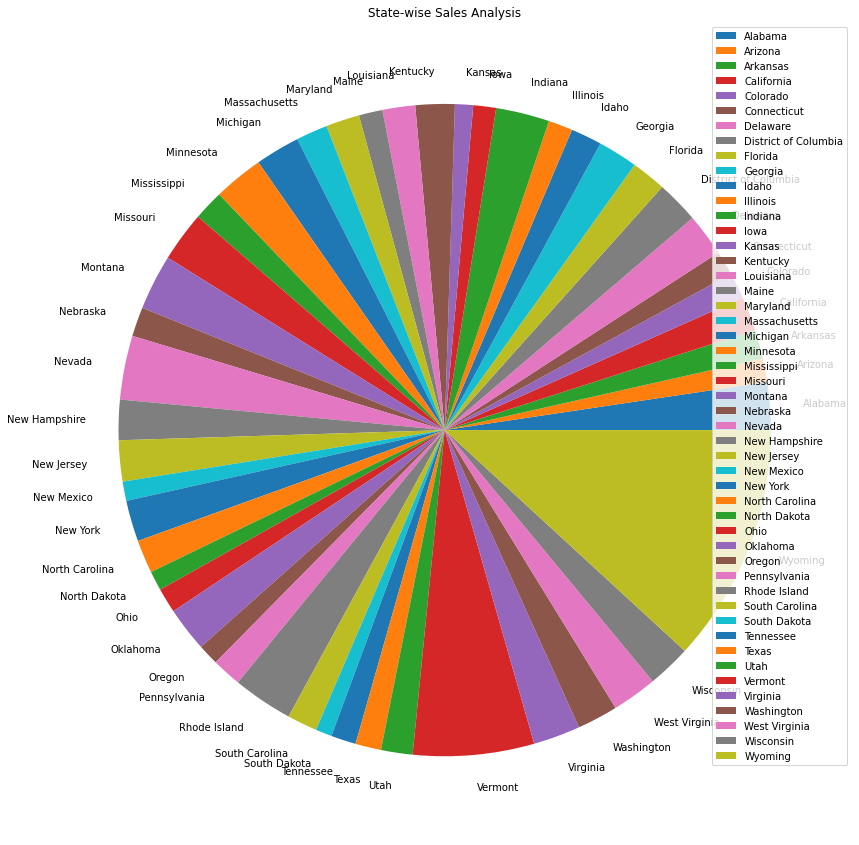

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(data_state['Sales'],labels = data_state.index)
plt.title("State-wise Sales Analysis")
plt.legend()
plt.show()

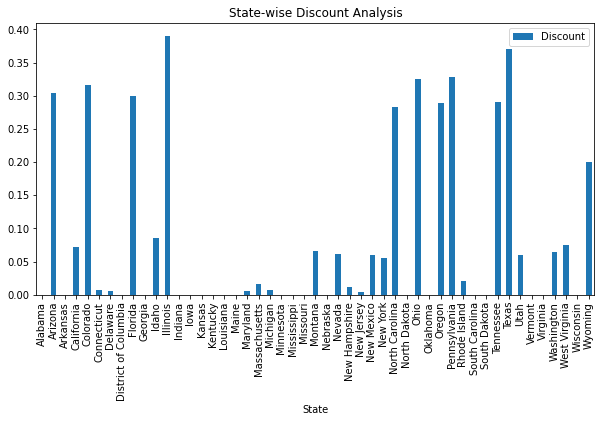

In [ ]:
plt.figure(figsize=(10,5))
data_state['Discount'].plot(kind='bar')
plt.title("State-wise Discount Analysis")
plt.legend()
plt.show()

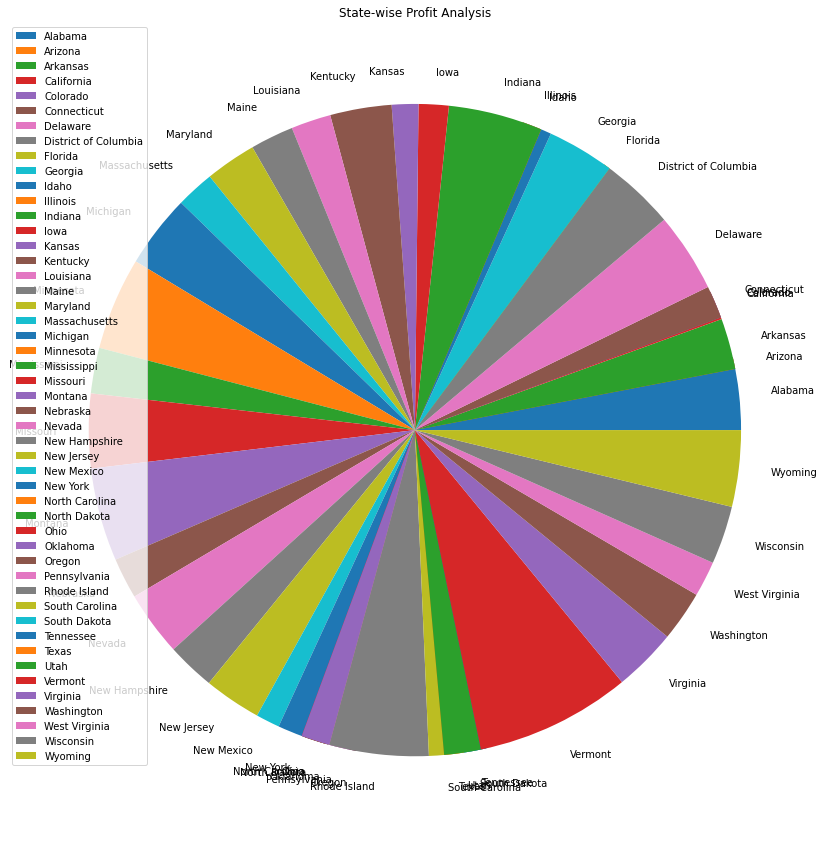

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(data_state['Profit'],labels = data_state.index)
plt.title("State-wise Profit Analysis")
plt.legend()
plt.show()

From State-wise analysis we can observe that:

1.In dealings,the top three states are California,New York,Texas.

2.The average number of deals per state=204.

3.Wyoming State has least number of dealings but has highest amount of sales.

4.In South Dakota state least amount of sales has been recorded.

3.The average number of deals per state=204.

4.Vermont state has highest profit and Ohio state has least profit.

5.Illinois sate has highest number of discounts.

City-wise Analysis

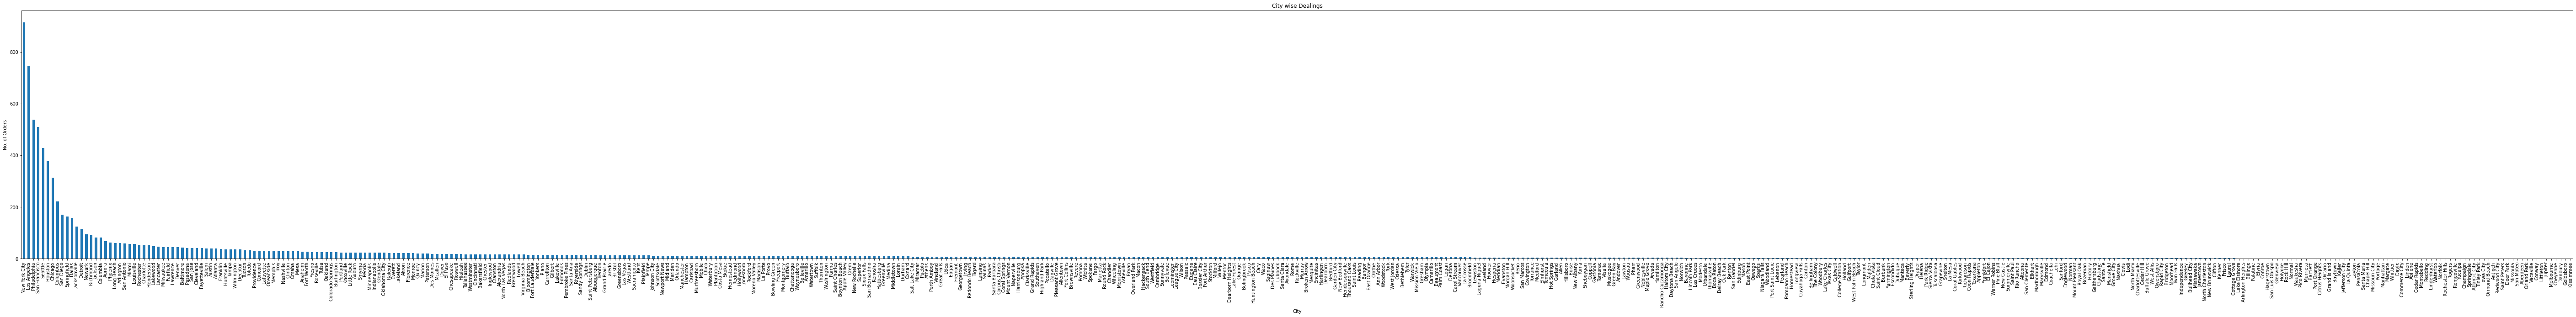

In [ ]:
plt.xlabel("City")
plt.ylabel("No. of Orders")
plt.title("City wise Dealings")
city_count=data["City"].value_counts()
city_count.plot(kind="bar",figsize=(100,10))
plt.show()

In [ ]:
data["City"].value_counts().mean()

18.821092278719398

By observing city-wise analysis:

1.The average number of dealings in cities is 19.

2.New York city has highest number of dealings.

Sub-Category Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


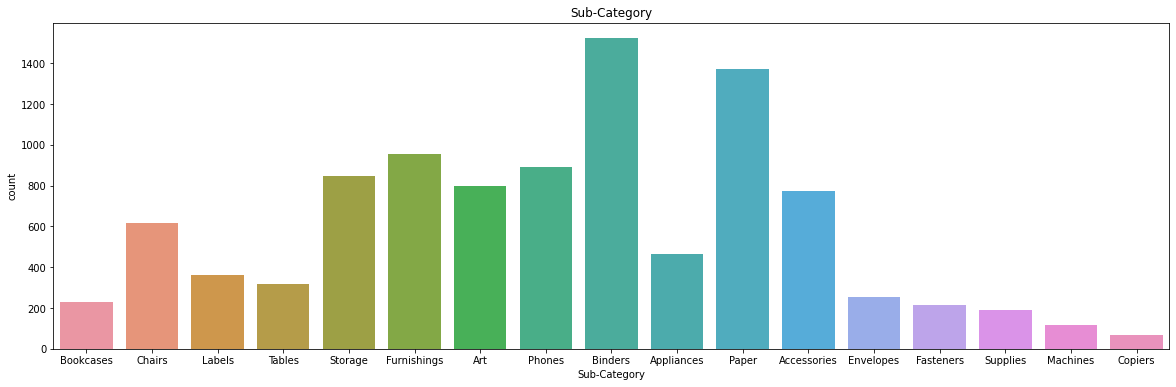

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Sub-Category')
sns.countplot(data["Sub-Category"])

In [ ]:
data_subCategory = data.groupby(["Sub-Category"])['Sales','Profit','Discount'].mean()
data_subCategory.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.068834,8.200737,0.074874
Binders,133.560560,19.843574,0.372292
Bookcases,503.859633,-15.230509,0.211140


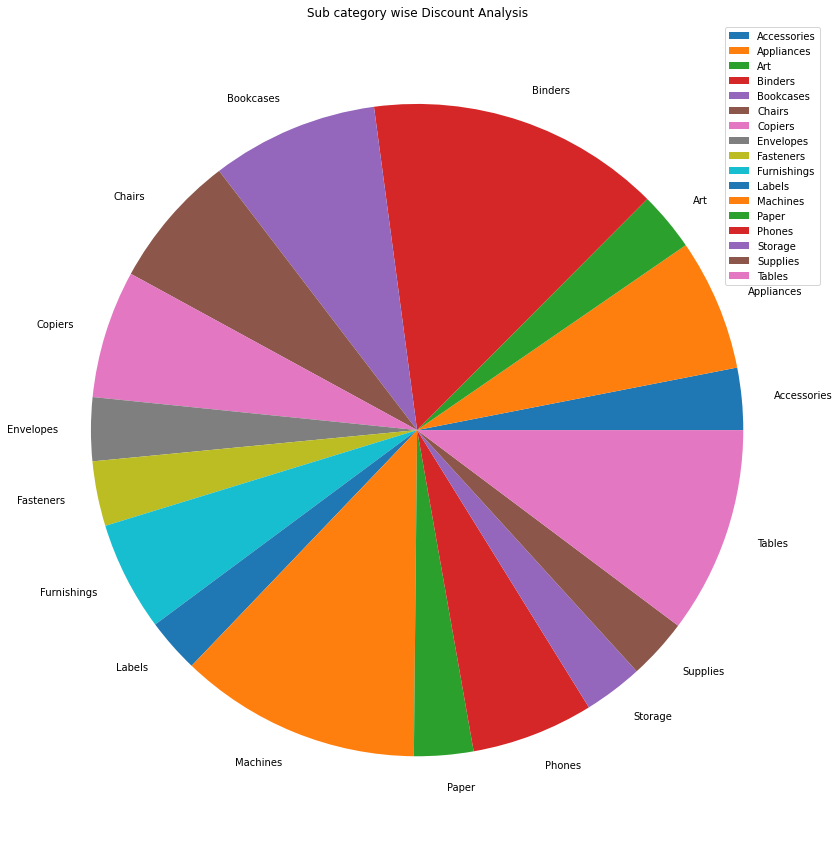

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(data_subCategory['Discount'],labels = data_subCategory.index)
plt.title("Sub category wise Discount Analysis")
plt.legend()
plt.show()

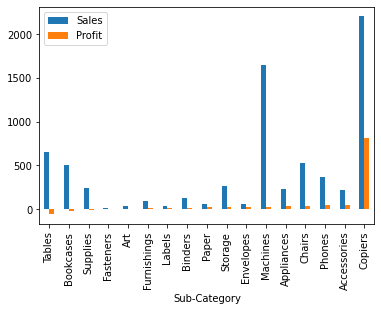

<Figure size 1080x1080 with 0 Axes>

In [ ]:
data_subCategory.sort_values('Profit')[['Sales','Profit']].plot(kind='bar')
plt.figure(figsize=(15,15))
plt.show()

From Subcategory Analysis we can conclude that:

1.Machines,Tables and Binders has high discount.

2.Copiers has highest sales and profits.


